In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
a = 10
c0 = 1
dx = 1
dy = 10**(-3)
nx = 100
ny = 20
deltax = 1
deltay = 0.4
n = 1000


In [120]:
def fun(x,y,t,alpha):
    return (abs(alpha*t)**(-1.5) * ((special.erf((a+y) / (4 * dy * abs(alpha*t))**0.5) + special.erf((a-y)/(4 * dy * abs(alpha*t))**0.5)) * np.exp(-((x-abs(alpha * t)) / (4 * dx * abs(alpha*t))**0.5)**2)))
def c(x,y,t):
    sum_ = 0
    for i in range(n):
        eta = np.cos(np.pi * (2 * i - 1) / (2 * n))
        sum_ += np.pi * (1 - eta**2)**0.5 * (fun(x,y,t,eta)) / n
    c = x * c0 * t * sum_ / (2 * (16 * np.pi * dx)**0.5)
    return c


In [121]:
data = pd.DataFrame(columns = ['x', 'y'])
for i,j in zip(list(np.arange(0, nx, deltax)), list(np.arange(-ny, ny, deltay))):
    data.loc[i] = [i*deltax, j*deltay] 
    

In [122]:
data.describe()

,x,y
count,100.000000,100.000000
mean,49.500000,-0.080000
std,29.011492,4.641839
min,0.000000,-8.000000
25%,24.750000,-4.040000
50%,49.500000,-0.080000
75%,74.250000,3.880000
max,99.000000,7.840000


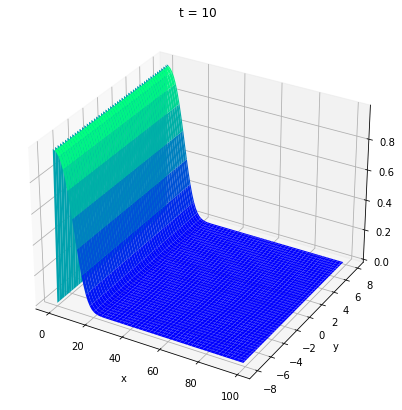

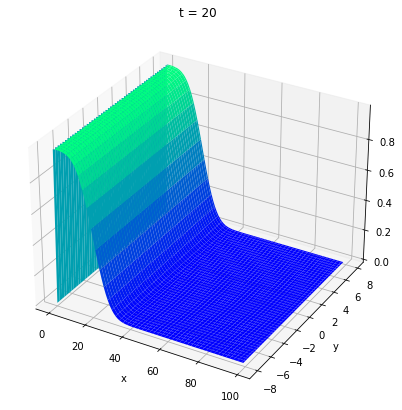

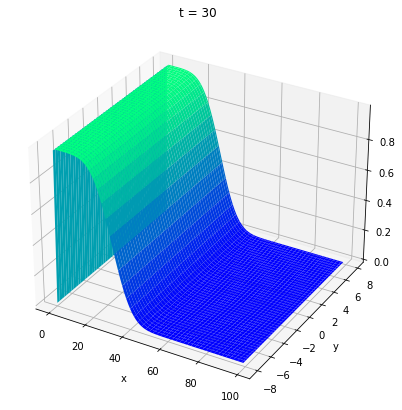

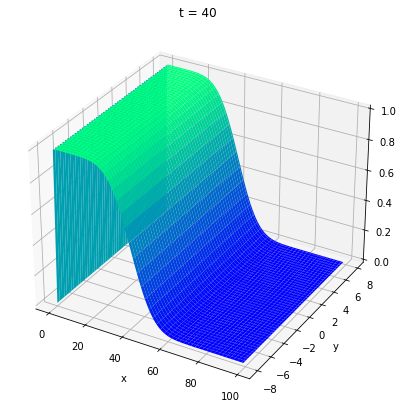

In [123]:
X, Y = data.x, data.y
X, Y = np.meshgrid(X,Y)

for t in range(10,50,10):
    Z = c(X, Y, t)
    fig = plt.figure(figsize=((7, 7)))
    ax = plt.axes(projection="3d")
    plt.title("t = "+ str(t))
    plt.xlabel("x")
    plt.ylabel("y")
    ax.plot_surface(X, Y, Z, cmap='winter', edgecolor='none')
    plt.show()

In [ ]:
0 1 xdx 

In [147]:
import scipy.integrate as integrate

sum_ = 0
n = 1000

for i in range(n):
        eta = np.cos(np.pi * (2 * i - 1) / (2 * n))
        sum_ += np.pi * abs(eta) / n
sum_/=2

integral = integrate.quad(lambda x: abs(x) / (1-x**2)**0.5, 0, 1)[0]
print(integral,sum_)

0.9999999999999885 1.1107207345395915


In [162]:
integral = integrate.quad(lambda x: (x+1)/4, -1, 1)
sum_ = 0
n = 2
for i in range(n):
        eta = np.cos(np.pi * (2 * i - 1) / (2 * n))
        sum_ += np.pi * (1 - eta**2)**0.5* (eta+1) / (4 * n)
print (integral[0] - sum_)

-0.4480594489685199


In [169]:
f = lambda x: x**2
f(4)

16